## Dataset: zoo
##### problem statement: Implement a KNN model to classify the animals in to categories


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [6]:
zoo=pd.read_csv("zoo.csv")

In [8]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
zoo.shape

(101, 18)

In [17]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [19]:

zoo.nunique()

animal name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
type             7
dtype: int64

In [29]:
# check if any animal is duplicated
duplicate = zoo['animal name'].value_counts()
duplicate[duplicate>1]

frog    2
Name: animal name, dtype: int64

In [28]:
frog = zoo[zoo['animal name'] == 'frog']
frog
# it is observed that both these frogs have different venomous state and hence they are different

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


array([[<AxesSubplot:title={'center':'hair'}>,
        <AxesSubplot:title={'center':'feathers'}>,
        <AxesSubplot:title={'center':'eggs'}>,
        <AxesSubplot:title={'center':'milk'}>],
       [<AxesSubplot:title={'center':'airborne'}>,
        <AxesSubplot:title={'center':'aquatic'}>,
        <AxesSubplot:title={'center':'predator'}>,
        <AxesSubplot:title={'center':'toothed'}>],
       [<AxesSubplot:title={'center':'backbone'}>,
        <AxesSubplot:title={'center':'breathes'}>,
        <AxesSubplot:title={'center':'venomous'}>,
        <AxesSubplot:title={'center':'fins'}>],
       [<AxesSubplot:title={'center':'legs'}>,
        <AxesSubplot:title={'center':'tail'}>,
        <AxesSubplot:title={'center':'domestic'}>,
        <AxesSubplot:title={'center':'catsize'}>],
       [<AxesSubplot:title={'center':'type'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

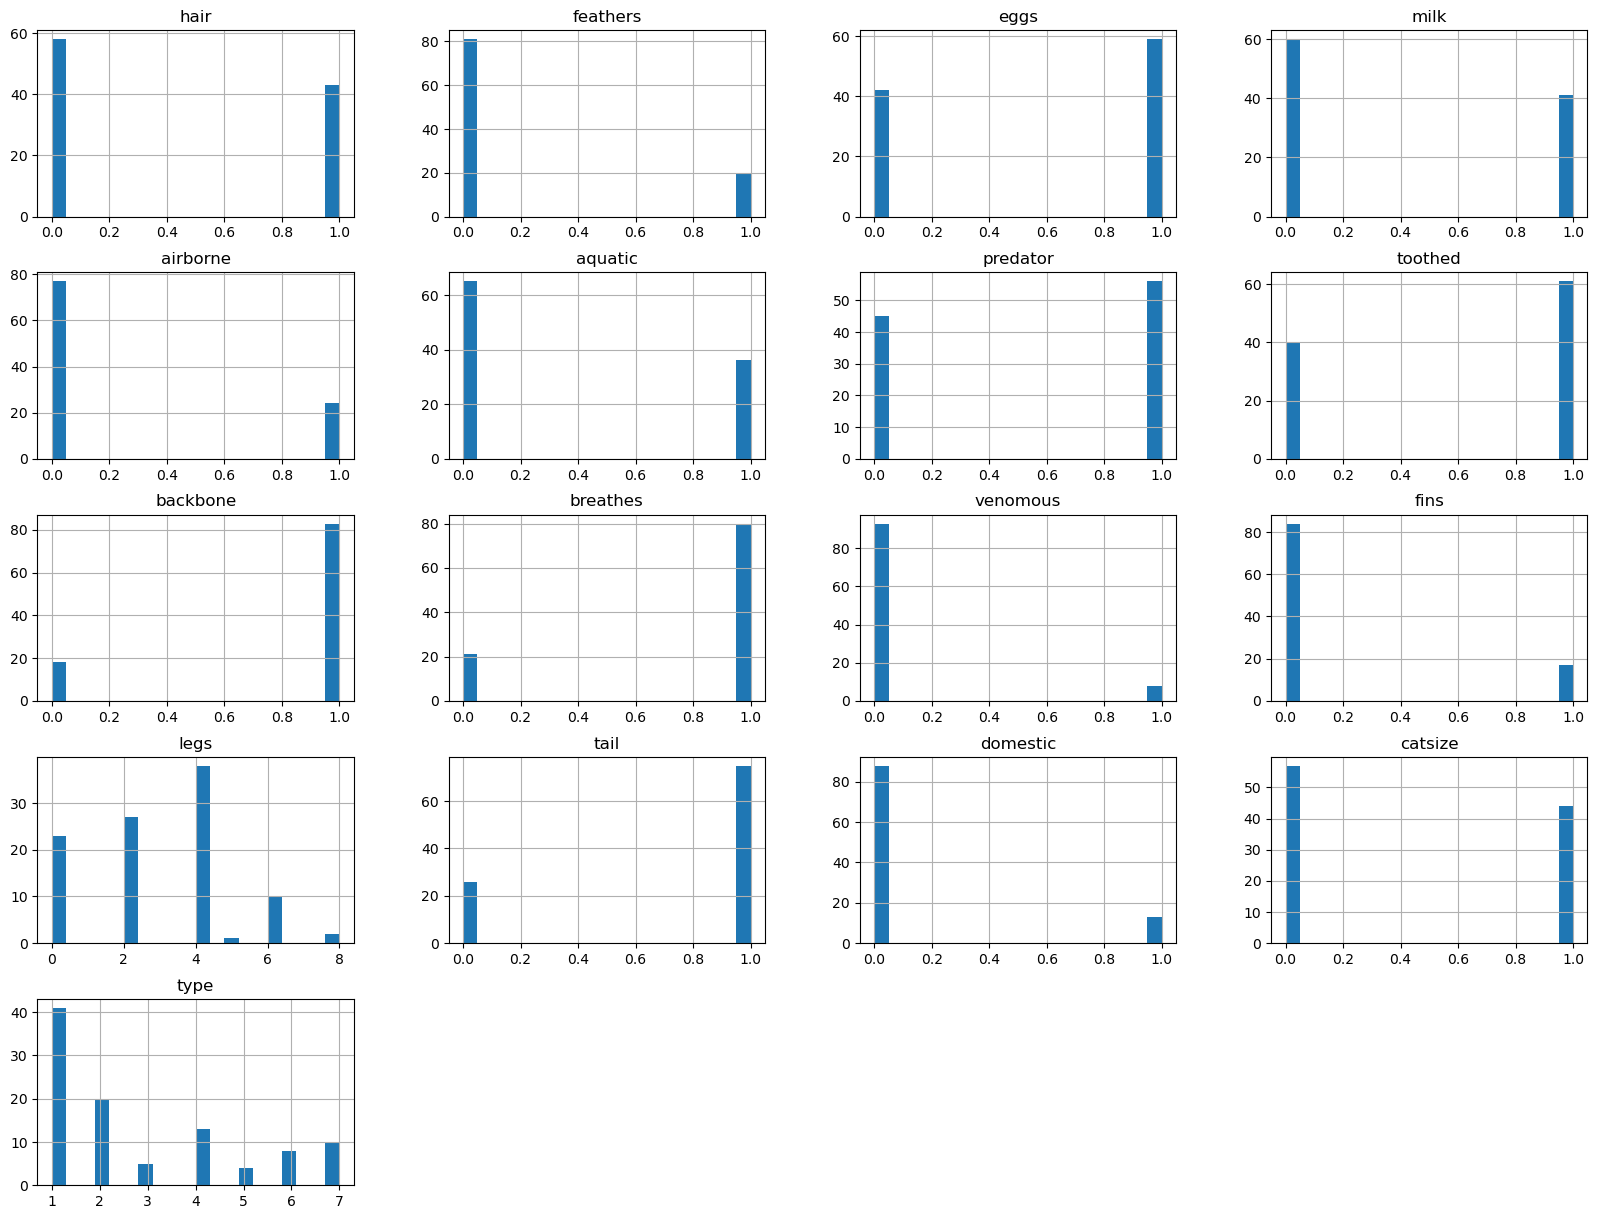

In [33]:
zoo.hist(bins=20, figsize=(20,15))

In [40]:
zoo['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [98]:
# making of the test-train data split as 70/30
from sklearn.model_selection import train_test_split
X = zoo.iloc[:,1:16]
Y = zoo.iloc[:,16]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [99]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
54,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
27,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0
58,0,1,1,0,0,1,1,0,1,1,0,0,2,1,0
33,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0
43,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
67,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
25,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0
68,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1


In [100]:
Y_train

54    0
27    0
58    1
33    0
43    0
     ..
83    0
67    1
25    0
68    1
47    1
Name: catsize, Length: 70, dtype: int64

## creating the KNN model

In [101]:
num_folds = 10
kfold = KFold(n_splits=10)

In [102]:
kfold

KFold(n_splits=10, random_state=None, shuffle=False)

In [141]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [142]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

0    20
1    11
dtype: int64

In [143]:
pd.crosstab(Y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
catsize,,
0,17,2
1,3,9


In [144]:
# Accuracy 
np.mean(preds==Y_test)

0.8387096774193549

In [145]:
model.score(X_train,Y_train)

0.8

In [146]:
#use cross validation score since this is a small size dataset 
#Get cross validation score of K-Nearest Neighbors

In [147]:
results = cross_val_score(model, X, Y, cv=kfold)

In [148]:
print(results.mean())

0.7627272727272728


### using GRIDSEARCH for finding the best N value

In [157]:
n_neighbors= np.array([i for i in  range(1,20)])
param_grid= dict(n_neighbors = n_neighbors)

In [159]:
model= KNeighborsClassifier()
grid = GridSearchCV(estimator=model , param_grid=param_grid)
grid.fit(X,Y)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [160]:
print(grid.best_score_)
print(grid.best_params_)

0.790952380952381
{'n_neighbors': 5}


## visualization

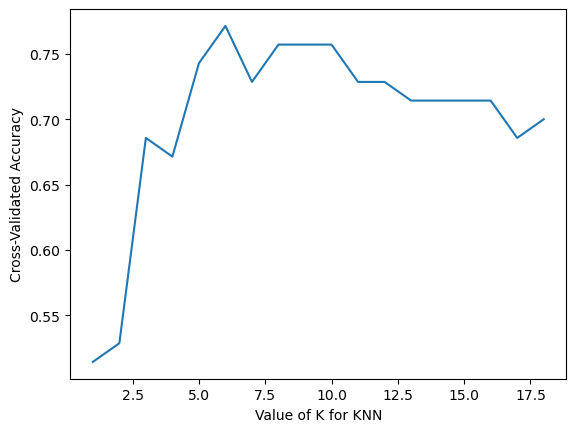

In [161]:
# Visualizatoin of the k values for the Training data
#choose k between 1 to 20
k_range = range(1, 19)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

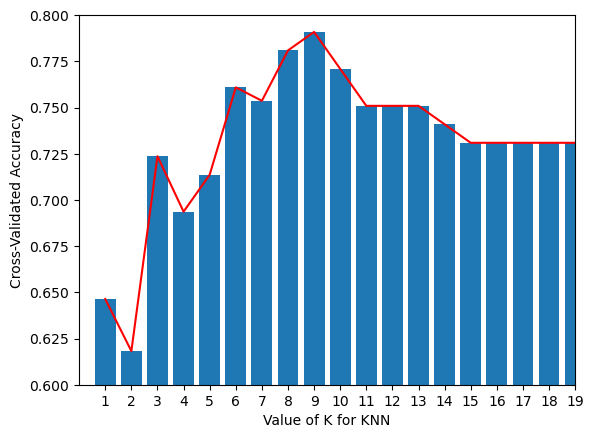

In [168]:
# visualization of the k values for the actual data
k_range = range(1, 20)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color='red')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.xlim(0.0,19)
plt.ylim(0.6,0.8)
plt.show()

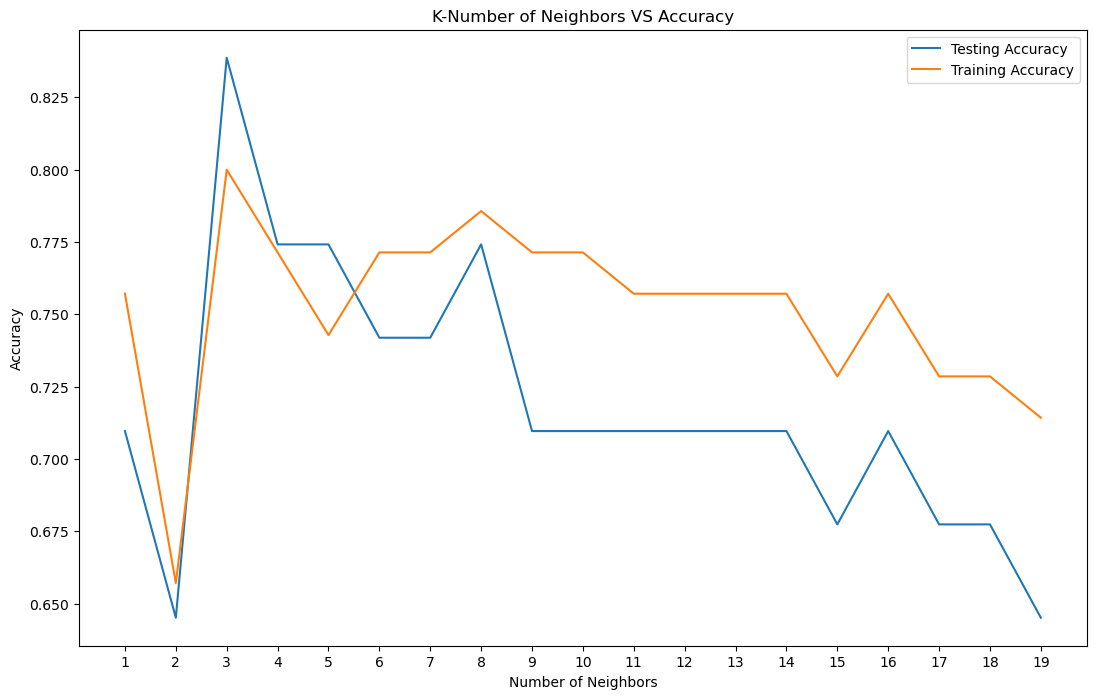

Best accuracy is 0.8387096774193549 with K = 3


In [169]:
# visualization of the data for the training vs the testing data
k_values = np.arange(1,20)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,Y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train,Y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test,Y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K-Number of Neighbors VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))